### 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import pickle

In [63]:
def read_data(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    X_train = data["X_train"].copy()
    X_valid = data["X_valid"].copy()
    X_test = data["X_test"].copy()
    y_train = data["y_train"].copy()
    y_valid = data["y_valid"].copy()
    y_test = data["y_test"].copy()
    features = data['feature_selection'].copy()
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test, features

In [71]:
data_path = 'Preprocessing/Final_data.pkl'
X_train, X_valid, X_test, y_train, y_valid, y_test, features = read_data(data_path)

In [72]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1194,1.103362,2,0.795480,2,0.693147,3,1,0.333333,0,0.242857,...,0.666667,0,1.000000,3.401197,-0.620189,0.666667,1.386294,-0.615492,0.693147,-0.595227
128,-1.634185,2,0.355932,1,0.693147,0,5,0.666667,1,1.000000,...,0.666667,0,0.333333,1.386294,-0.620189,0.666667,1.098612,-0.891589,1.098612,-0.875581
810,0.993860,2,0.213559,2,1.098612,0,2,0.000000,1,0.314286,...,1.000000,0,0.333333,3.178054,0.155707,0.666667,2.564949,1.317193,1.609438,1.367249
478,-1.305679,2,0.376271,2,2.564949,0,3,0.333333,1,0.142857,...,0.666667,0,0.000000,2.079442,-1.396086,0.666667,2.079442,-0.063296,0.000000,0.526188
491,0.665354,1,0.642938,1,2.197225,4,3,1.000000,1,0.600000,...,0.333333,0,0.333333,2.397895,0.155707,0.666667,2.197225,0.764998,1.609438,0.806541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,-1.524683,2,0.224859,2,1.945910,2,1,0.666667,1,0.985714,...,0.333333,0,0.333333,1.386294,-0.620189,0.666667,1.386294,-0.615492,0.000000,-0.595227
963,0.117845,2,0.647458,2,0.693147,1,1,0.333333,0,0.014286,...,1.000000,0,0.333333,2.484907,0.155707,0.666667,2.079442,0.764998,0.693147,0.806541
734,-1.634185,2,0.089266,1,2.079442,0,1,0.333333,1,0.914286,...,0.000000,0,0.333333,1.609438,0.155707,0.333333,1.609438,-0.339394,0.693147,-0.875581
1315,-0.101159,2,0.228249,1,0.693147,3,4,1.000000,0,0.614286,...,1.000000,0,0.333333,2.772589,-0.620189,0.666667,0.693147,-1.167687,0.000000,-1.155935


In [56]:
features

,RFE,VIF,PCA,Select
Age,1,1,1,1
BusinessTravel,1,0,1,1
DailyRate,1,1,0,1
Department,0,0,1,1
DistanceFromHome,1,1,0,1
Education,0,1,1,1
EducationField,0,1,1,0
EnvironmentSatisfaction,1,1,1,1
Gender,0,1,1,1
HourlyRate,1,1,0,1


### 2. Model Selection

In [28]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, make_scorer, recall_score, f1_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Ở đây bước ***preprocessing*** và ***Imbalance Handling*** được tách riêng, do đó pipeline sẽ chỉ bao gồm bước ***estimate***

In [6]:
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [7]:
models = {
            'RFC': RandomForestClassifier(),
            'GaussianNB': GaussianNB(),
            'XGB': XGBClassifier(),
            'XGBRF': XGBRFClassifier(),
            'CatBoost': CatBoostClassifier(),
            'LGBM': LGBMClassifier()
        }

In [10]:
mean, std, all_scores = [], [], []

for model_name, model in models.items():
    print(model_name)
    
    pl = Pipeline(
        steps=[
            ('classifier', model)
        ]
    )
    
    metric = make_scorer(roc_auc_score)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
    
    scores = cross_val_score(pl, X_train_resampled, y_train_resampled, scoring=metric, cv=cv)
    all_scores.append(scores)
    
    print('-' * 30)
    
    mean.append(np.mean(scores))
    std.append(np.std(scores))

RFC
------------------------------
GaussianNB
------------------------------
XGB
------------------------------
XGBRF
------------------------------
CatBoost
Learning rate set to 0.013125
0:	learn: 0.6842153	total: 2.84ms	remaining: 2.84s
1:	learn: 0.6752176	total: 5.55ms	remaining: 2.77s
2:	learn: 0.6680590	total: 9.98ms	remaining: 3.32s
3:	learn: 0.6614326	total: 12.7ms	remaining: 3.15s
4:	learn: 0.6553093	total: 15ms	remaining: 2.99s
5:	learn: 0.6476121	total: 17.4ms	remaining: 2.88s
6:	learn: 0.6417753	total: 21ms	remaining: 2.98s
7:	learn: 0.6363754	total: 23.3ms	remaining: 2.89s
8:	learn: 0.6293445	total: 25.8ms	remaining: 2.84s
9:	learn: 0.6239643	total: 30.3ms	remaining: 3s
10:	learn: 0.6184763	total: 32.9ms	remaining: 2.96s
11:	learn: 0.6136060	total: 36ms	remaining: 2.96s
12:	learn: 0.6073237	total: 38.7ms	remaining: 2.94s
13:	learn: 0.6004235	total: 41.2ms	remaining: 2.9s
14:	learn: 0.5948481	total: 43.5ms	remaining: 2.85s
15:	learn: 0.5893392	total: 48.1ms	remaining: 2.96s


In [22]:
scores_df = pd.DataFrame()
scores_df['Mean (ROC AUC Score)'] = mean
scores_df['Std'] = std
scores_df.index = models.keys()
scores_df

,Mean (ROC AUC Score),Std
RFC,0.936415,0.019806
GaussianNB,0.683815,0.031621
XGB,0.930584,0.017339
XGBRF,0.876035,0.025265
CatBoost,0.941773,0.018059
LGBM,0.933702,0.020152


In [27]:
from scipy.stats import ttest_ind
import itertools

scores = {
    'Random Forest': all_scores[0],
    'XGBoost': all_scores[2],
    'Catboost': all_scores[4],
    'LightGBM': all_scores[5]
}

ttest_results = []

for model1, model2 in itertools.combinations(scores.keys(), 2):
    score1 = scores[model1]
    score2 = scores[model2]
    stat, p_value = ttest_ind(score1, score2)
    
    ttest_results.append({
        'Score 1': model1,
        'Score 2': model2,
        'P-value': p_value
    })

ttest_df = pd.DataFrame(ttest_results)
ttest_df['Conclusion'] = ttest_df['P-value'].apply(lambda x: 'Significant' if x < 0.05 else 'Not significant')
ttest_df

,Score 1,Score 2,P-value,Conclusion
0,Random Forest,XGBoost,0.124261,Not significant
1,Random Forest,Catboost,0.164848,Not significant
2,Random Forest,LightGBM,0.503132,Not significant
3,XGBoost,Catboost,0.002315,Significant
4,XGBoost,LightGBM,0.413696,Not significant
5,Catboost,LightGBM,0.039402,Significant


Từ kết quả trên, ta sẽ lựa chọn mô hình ***Catboost*** để huấn luyện

Text(0.5, 1.0, 'Scores Metrics')

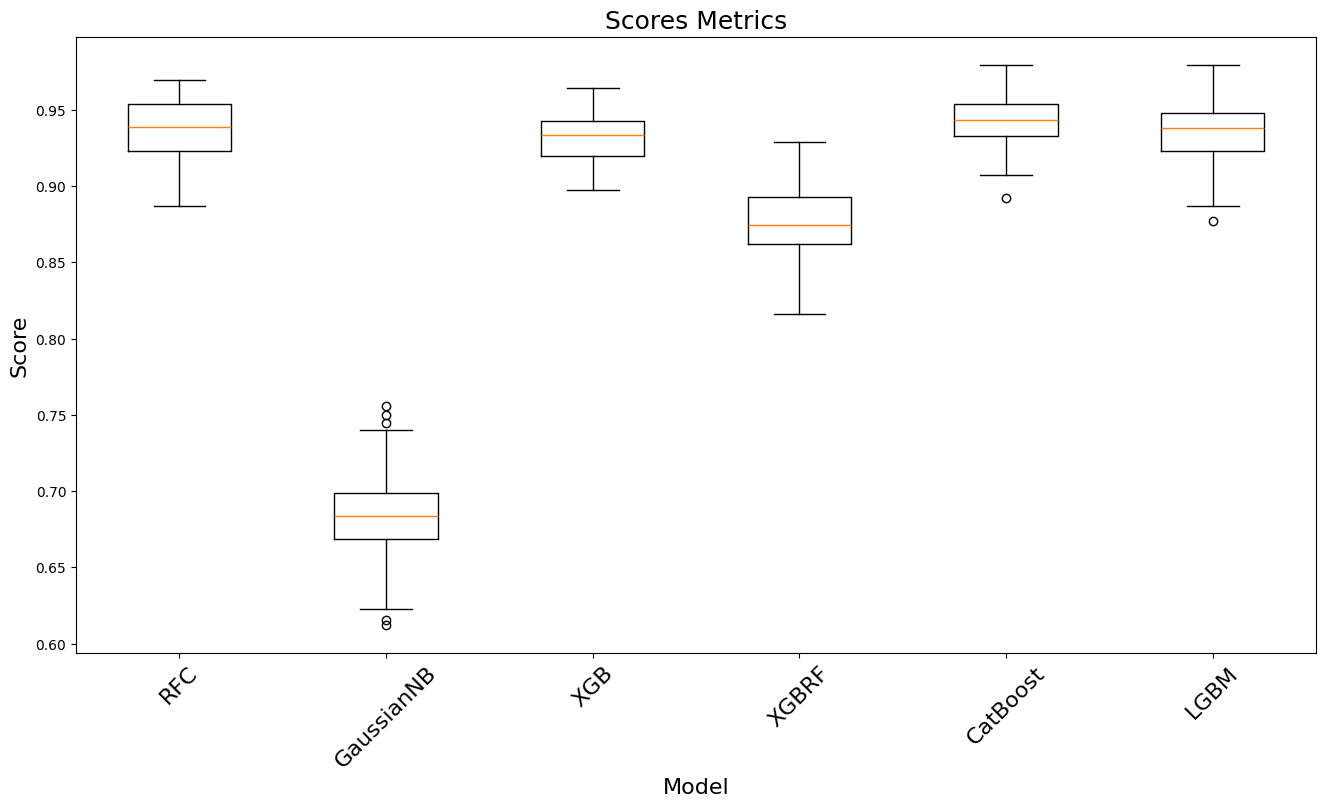

In [12]:
import matplotlib.pyplot as plt
model_names = models.keys()

plt.figure(figsize=(16, 8))
plt.boxplot(all_scores)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)

### 3. Fine-tuning

Sử dụng ***optuna***

In [40]:
import optuna
import time
def objective(trial, X_train, y_train, X_val, y_val, target='accuracy'):
    metrics = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1_score': f1_score,
        'roc_auc': roc_auc_score
    }
    score = metrics.get(target, accuracy_score)

    # Suggest hyperparameters
    bootstrap_type = trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS'])

    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'random_strength': trial.suggest_int('random_strength', 1, 20),
        'max_leaves': trial.suggest_int('max_leaves', 20, 64),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 20),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 5.0),
        'grow_policy': trial.suggest_categorical('grow_policy', ["Lossguide"]),
        'bootstrap_type': bootstrap_type,
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 100),
        'verbose': 0,
    }

    if bootstrap_type == 'Bayesian':
        params['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0.0, 1.0)
    elif bootstrap_type == 'Bernoulli':
        params['subsample'] = trial.suggest_float('subsample', 0.5, 1.0)

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=0)
    
    y_pred = model.predict(X_val)
    return score(y_val, y_pred)


In [ ]:
n_trials=100
target = 'roc_auc'
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_train_resampled, y_train_resampled, X_valid, y_valid, target), n_trials)

timestamp = int(time.time())
n_features = X_train_resampled.shape[1]
save_path = f"Models/Catboost/catboost_model__{n_features}_features__{target}_objective__{timestamp}.cbm"

best_model = CatBoostClassifier(**study.best_trial.params)
best_model.fit(X_train_resampled, y_train_resampled)

best_model.save_model(save_path)
print(f'Best model saved to {save_path}')

ConfusionMatrixDisplay.from_estimator(best_model, X_valid, y_valid)

### 4. Evaluation

In [ ]:
def plot_cm(validation_set = 'train', clf = model):
    if validation_set == 'train':
        X, y = X_train, y_train
    elif validation_set in ['val', 'valid', 'dev'] :
        X, y = X_valid, y_valid
    elif validation_set == 'test':
        X, y = X_test, y_test
    else:
        raise(ValueError(f'Unknown validation-set type: {validation_set}'))
    y_pred = clf.predict(X)
    print(f'Accuracy score: {accuracy_score(y, y_pred):.4f}, F1-Score: {f1_score(y, y_pred):.4f}')
    ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()

Accuracy score: 0.7823, F1-Score: 0.4667


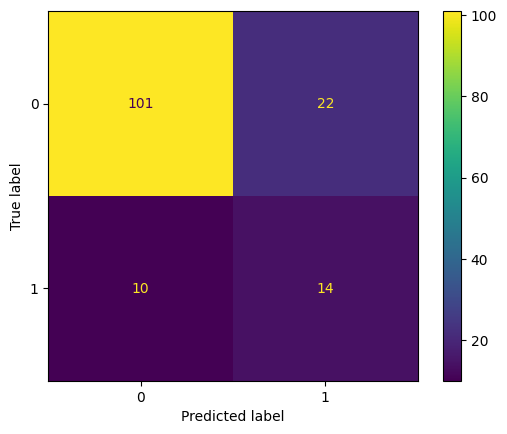

In [44]:
# load model
model = CatBoostClassifier()
model.load_model('Models/Catboost/catboost_model__31_features__roc_auc_objective__1744045908.cbm')
# plot confusion matrix
plot_cm('test', model)

### 5. More Trial

#### 5.1. Less features

In [ ]:
X_train, X_valid, X_test, y_train, y_valid, y_test, features = read_data(data_path)

In [57]:
features

,RFE,VIF,PCA,Select
Age,1,1,1,1
BusinessTravel,1,0,1,1
DailyRate,1,1,0,1
Department,0,0,1,1
DistanceFromHome,1,1,0,1
Education,0,1,1,1
EducationField,0,1,1,0
EnvironmentSatisfaction,1,1,1,1
Gender,0,1,1,1
HourlyRate,1,1,0,1


##### 5.1.1. 27 features

In [ ]:
selected_features = features[features['Select'] == 1].index
X_train = X_train.loc[:, selected_features]
X_valid = X_valid.loc[:, selected_features]
X_test = X_test.loc[:, selected_features]

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

n_trials=100
target = 'roc_auc'
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_train_resampled, y_train_resampled, X_valid, y_valid, target), n_trials)

timestamp = int(time.time())
n_features = X_train_resampled.shape[1]
save_path = f"Models/Catboost/catboost_model__{n_features}_features__{target}_objective__{timestamp}.cbm"

best_model = CatBoostClassifier(**study.best_trial.params)
best_model.fit(X_train_resampled, y_train_resampled)

best_model.save_model(save_path)
print(f'Best model saved to {save_path}')

Accuracy score: 0.7891, F1-Score: 0.3673


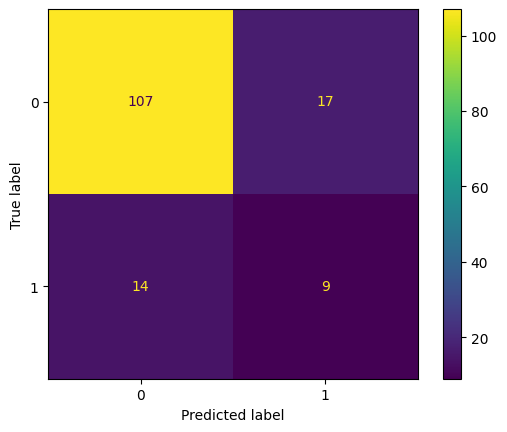

In [ ]:
model = CatBoostClassifier()
model.load_model('Models/Catboost/catboost_model__27_features__roc_auc_objective__1744046543.cbm')
# plot confusion matrix
plot_cm('test', model)

##### 5.1.2. 24 features

In [ ]:
X_train, X_valid, X_test, y_train, y_valid, y_test, features = read_data(data_path)

selected_features = features[features['RFE'] == 1].index
X_train = X_train.loc[:, selected_features]
X_valid = X_valid.loc[:, selected_features]
X_test = X_test.loc[:, selected_features]

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

n_trials = 100
target = 'roc_auc'
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_train_resampled, y_train_resampled, X_valid, y_valid, target), n_trials)

timestamp = int(time.time())
n_features = X_train_resampled.shape[1]
save_path = f"Models/Catboost/catboost_model__{n_features}_features__{target}_objective__{timestamp}.cbm"

best_model = CatBoostClassifier(**study.best_trial.params)
best_model.fit(X_train_resampled, y_train_resampled)

best_model.save_model(save_path)
print(f'Best model saved to {save_path}')

Accuracy score: 0.8027, F1-Score: 0.2564


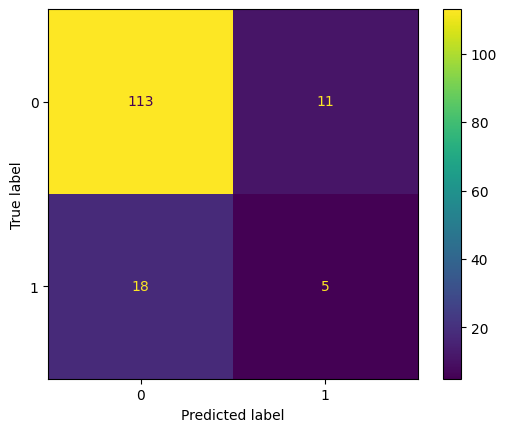

In [67]:
model = CatBoostClassifier()
model.load_model('Models/Catboost/catboost_model__24_features__roc_auc_objective__1744048268.cbm')
# plot confusion matrix
plot_cm('test', model)

##### 5.1.3. 21 features

In [68]:
X_train, X_valid, X_test, y_train, y_valid, y_test, features = read_data(data_path)

selected_features = features[features['PCA'] == 1].index
X_train = X_train.loc[:, selected_features]
X_valid = X_valid.loc[:, selected_features]
X_test = X_test.loc[:, selected_features]

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

n_trials = 100
target = 'roc_auc'
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_train_resampled, y_train_resampled, X_valid, y_valid, target), n_trials)

timestamp = int(time.time())
n_features = X_train_resampled.shape[1]
save_path = f"Models/Catboost/catboost_model__{n_features}_features__{target}_objective__{timestamp}.cbm"

best_model = CatBoostClassifier(**study.best_trial.params)
best_model.fit(X_train_resampled, y_train_resampled)

best_model.save_model(save_path)
print(f'Best model saved to {save_path}')

[I 2025-04-08 00:52:29,445] A new study created in memory with name: no-name-6b6f2192-54fe-451e-830f-24a8e38cdcaf
[I 2025-04-08 00:52:30,087] Trial 0 finished with value: 0.6707317073170732 and parameters: {'bootstrap_type': 'Bernoulli', 'iterations': 1800, 'learning_rate': 0.20692572785578273, 'depth': 9, 'random_strength': 4, 'max_leaves': 41, 'min_data_in_leaf': 12, 'scale_pos_weight': 2.1187073713043505, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.22334632143395325, 'border_count': 203, 'od_type': 'Iter', 'od_wait': 30, 'subsample': 0.6567435960125383}. Best is trial 0 with value: 0.6707317073170732.
[I 2025-04-08 00:52:30,451] Trial 1 finished with value: 0.4872967479674797 and parameters: {'bootstrap_type': 'Bayesian', 'iterations': 1100, 'learning_rate': 0.004971211111374524, 'depth': 8, 'random_strength': 8, 'max_leaves': 25, 'min_data_in_leaf': 7, 'scale_pos_weight': 3.4387976786700287, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.0838680935115484, 'border_count': 132, 'od_ty

0:	learn: 0.6095175	total: 4.14ms	remaining: 6.62s
1:	learn: 0.5570381	total: 8.28ms	remaining: 6.62s
2:	learn: 0.5216896	total: 12.1ms	remaining: 6.46s
3:	learn: 0.4982545	total: 16ms	remaining: 6.39s
4:	learn: 0.4732252	total: 19.6ms	remaining: 6.24s
5:	learn: 0.4590148	total: 23.8ms	remaining: 6.32s
6:	learn: 0.4378762	total: 28.3ms	remaining: 6.43s
7:	learn: 0.4228886	total: 32.7ms	remaining: 6.51s
8:	learn: 0.4139947	total: 36.3ms	remaining: 6.41s
9:	learn: 0.3913411	total: 39.7ms	remaining: 6.3s
10:	learn: 0.3768358	total: 42.6ms	remaining: 6.16s
11:	learn: 0.3653874	total: 46.2ms	remaining: 6.11s
12:	learn: 0.3576372	total: 50.6ms	remaining: 6.17s
13:	learn: 0.3476196	total: 54.9ms	remaining: 6.22s
14:	learn: 0.3406066	total: 58.8ms	remaining: 6.21s
15:	learn: 0.3332766	total: 63.4ms	remaining: 6.27s
16:	learn: 0.3173740	total: 68.6ms	remaining: 6.39s
17:	learn: 0.3133319	total: 71.5ms	remaining: 6.28s
18:	learn: 0.3098442	total: 75.9ms	remaining: 6.32s
19:	learn: 0.3038004	tota

Accuracy score: 0.8163, F1-Score: 0.2703


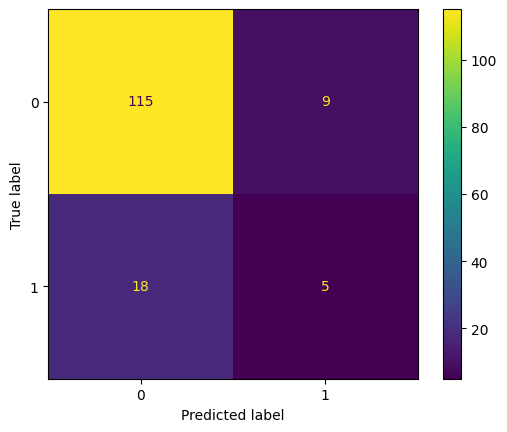

In [70]:
model = CatBoostClassifier()
model.load_model('Models/Catboost/catboost_model__21_features__roc_auc_objective__1744048427.cbm')
# plot confusion matrix
plot_cm('test', model)

#### 5.2. Ensemble methods

Sử dụng kết hợp ***Catboost Classifier*** và ***LightGBM Classier***